### Reflection Coeffs. for the Lunar Interior

Written by *Nick Mancinelli*, July 2018

In [1]:
from rtcoef import rtcoef, rtcoefSH
from numpy import linspace

#mantle properties (above PML)
vp0 = 8.5
vs0 = 4.5
den0= 3.4

#lower mantle properties (below PML)
vp1 = 7.5
vs1 = 3.2
den1= 3.4

#oc properties
vp2 = 4.1
vs2 = 0.0001
den2= 5.1

#ic properties
vp3 = 4.3
vs3 = 2.3
den3= 8.0


hslows = linspace(0.0001,0.13,100)

rpcp = []
rscs = []
rscp = []
rpcs = []
rpkikp = []
rscs_sh = []

for hslow in hslows:
    rt=rtcoef(vp1, vs1, den1, vp2, vs2, den2, hslow)
    rpcp.append(rt[1].real)
    rscs.append(rt[6].real)
    rscp.append(rt[5].real)
    rpcs.append(rt[2].real)
    
    tmp, _ = rtcoefSH(vs1,den1,vs2,den2,hslow)
    rscs_sh.append(tmp)
    
for hslow in hslows:
    rt=rtcoef(vp2, vs2, den2, vp3, vs3, den3, hslow)
    rpkikp.append(rt[1].real)
    
rpcp_pml = []
rscs_pml = []
rscs_pml_sh = []
rscp_pml = []
rpcs_pml = []
    
for hslow in hslows:
    rt=rtcoef(vp0, vs0, den0, vp1, vs1, den1, hslow)
    rpcp_pml.append(rt[1].real)
    rscs_pml.append(rt[6].real)
    rscp_pml.append(rt[5].real)
    rpcs_pml.append(rt[2].real)
    
    tmp, _ = rtcoefSH(vs0,den0,vs1,den1,hslow)
    rscs_pml_sh.append(tmp)
    

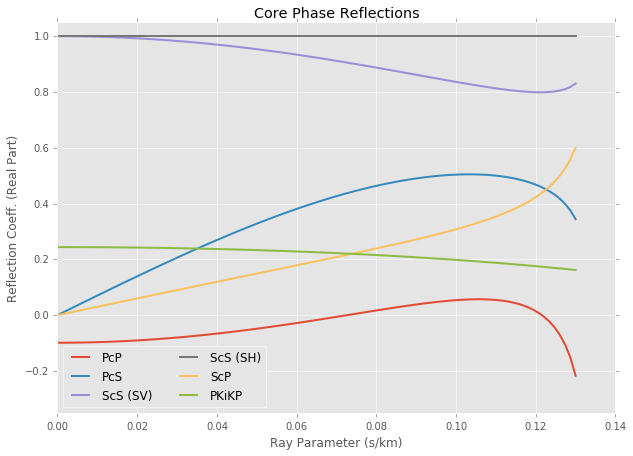

In [2]:
from matplotlib import pylab as plt

from numpy import array

%matplotlib inline
plt.style.use('ggplot')

lw = 2

plt.figure(1,(10,7))
plt.title('Core Phase Reflections')

_ = plt.plot(hslows,rpcp, label = 'PcP', lw = lw)
_ = plt.plot(hslows,rpcs, label = 'PcS', lw = lw)
_ = plt.plot(hslows,rscs, label = 'ScS (SV)', lw = lw)
_ = plt.plot(hslows,rscs_sh, label = 'ScS (SH)', lw = lw)
_ = plt.plot(hslows,rscp, label = 'ScP', lw = lw)
_ = plt.plot(hslows,rpkikp, label = 'PKiKP', lw = lw)

plt.xlabel('Ray Parameter (s/km)'), plt.ylabel('Reflection Coeff. (Real Part)')
plt.ylim(-0.35,1.05)
_ = plt.legend(loc='best',ncol=2)

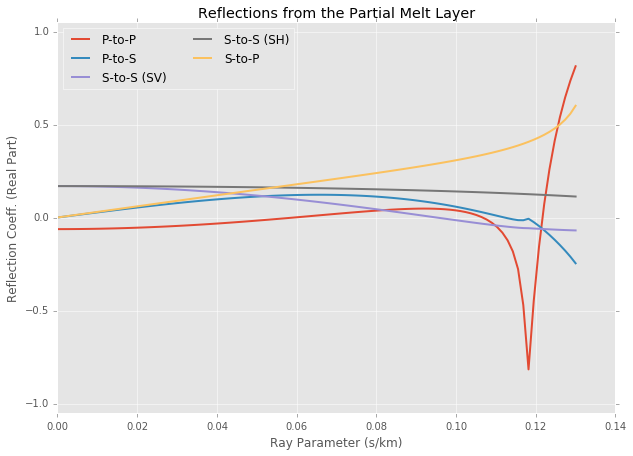

In [3]:
plt.figure(1,(10,7))

_ = plt.plot(hslows,rpcp_pml, label = 'P-to-P', lw = lw)
_ = plt.plot(hslows,rpcs_pml, label = 'P-to-S', lw = lw)
_ = plt.plot(hslows,rscs_pml, label = 'S-to-S (SV)', lw = lw)
_ = plt.plot(hslows,rscs_pml_sh, label = 'S-to-S (SH)', lw = lw)
_ = plt.plot(hslows,rscp, label = 'S-to-P', lw = lw)

plt.title('Reflections from the Partial Melt Layer')
plt.xlabel('Ray Parameter (s/km)'), plt.ylabel('Reflection Coeff. (Real Part)')
plt.ylim(-1.05,1.05)

_ = plt.legend(loc='best',ncol=2)